# 画图碎碎念 

## Matplotlib: Visualization with Python
以下是官网介绍 （https://matplotlib.org/）

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

-Create publication quality plots.

-Make interactive figures that can zoom, pan, update.

-Customize visual style and layout.

-Export to many file formats.

-Embed in JupyterLab and Graphical User Interfaces.

-Use a rich array of third-party packages built on Matplotlib.

### 下图是官网对初学者的示例代码（https://matplotlib.org/cheatsheets/_images/handout-beginner.png）

-首先是initialize-导入数据和画图所需的包（numpy 以及matplotlib.pyplot）

-然后对数据进行预处理达到画图要求后进行画图

-画图过程中可以选择不同画图类型适配需求（如提到的散点图scatter,柱状图bar,热力图imshow,等高线图contourf，饼图pie，箱线图boxplot等等）
    *ps:示例代码（https://matplotlib.org/stable/plot_types/index）
    
-选定画图类型后可以调成画图参数取得效果（比如线条颜色， 线条风格，线条宽度，点的marker类型）

-同时可以安排多个子图（plt.subplots）,并为图标加上标题(plt.title)和标签(plt.label)

-保存图片（plt.savefig,指定分辨率的话可以参数中加上dpi=xxx）

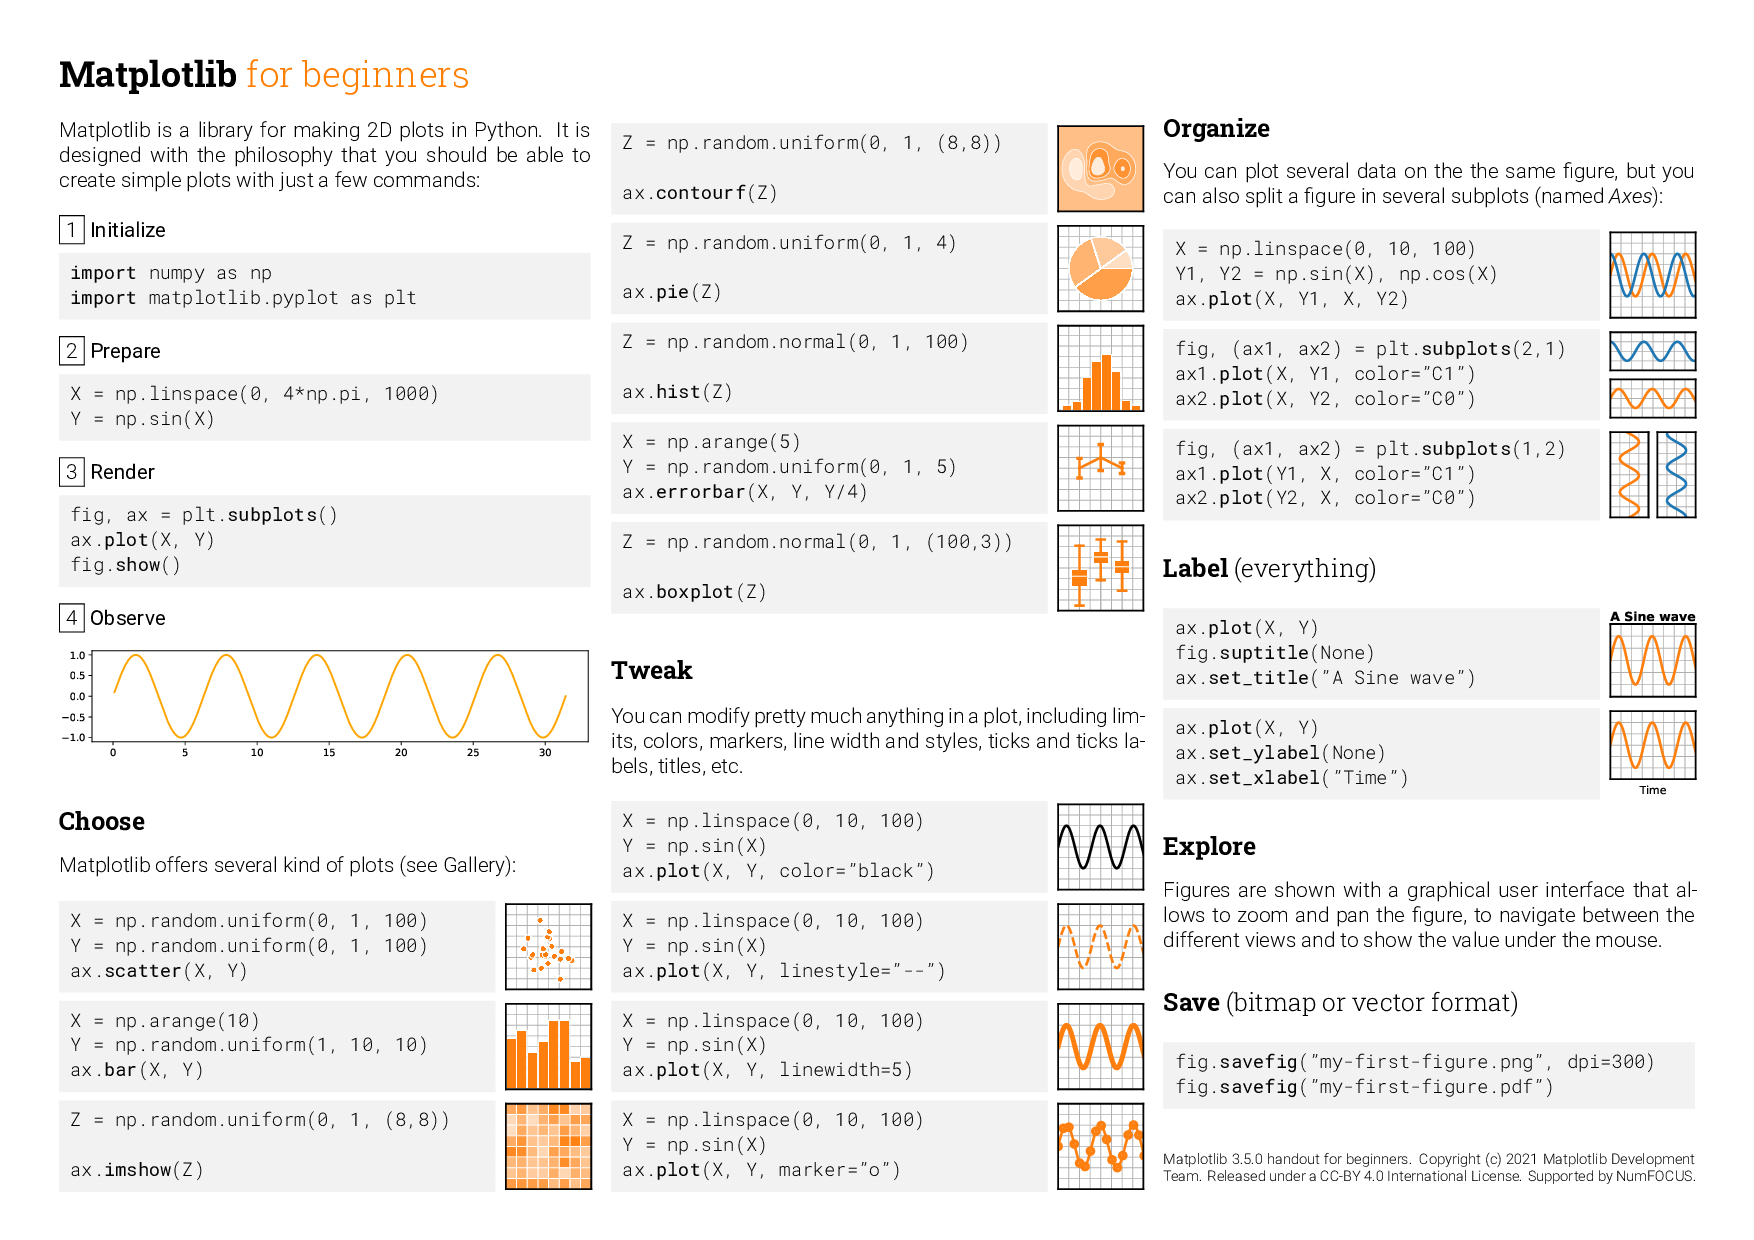

#### 以野火图像中不同地物类型的光谱曲线为例画图（单图 & 多图）

首先是单图的绘画

In [3]:
# 载入数据处理包numpy 和 画图包 matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt


#载入数据，这里是处理完毕的txt格式
df1 = np.loadtxt(r'G:\HIMAWARI-\cloud.txt')
df2 = np.loadtxt(r'G:\HIMAWARI-\fp.txt')
df3 = np.loadtxt(r'G:\HIMAWARI-\vegetation1.txt')
df4 = np.loadtxt(r'G:\HIMAWARI-\vegetation2.txt')
df5 = np.loadtxt(r'G:\HIMAWARI-\vegetation3.txt')
df6 = np.loadtxt(r'G:\HIMAWARI-\water.txt')
df1[:,1] = df1[:,1]/10000
df2[:,1] = df2[:,1]/10000
df3[:,1] = df3[:,1]/10000
df4[:,1] = df4[:,1]/10000
df5[:,1] = df5[:,1]/10000
df6[:,1] = df6[:,1]/10000

#### 水体光谱曲线txt概览（预处理手动删掉了头部因为只有6个地物类型，excel文件比较多的时候删掉头部可以通过代码参数指定） ,读取excel和csv文件可以看后边！（如果我写了23333）
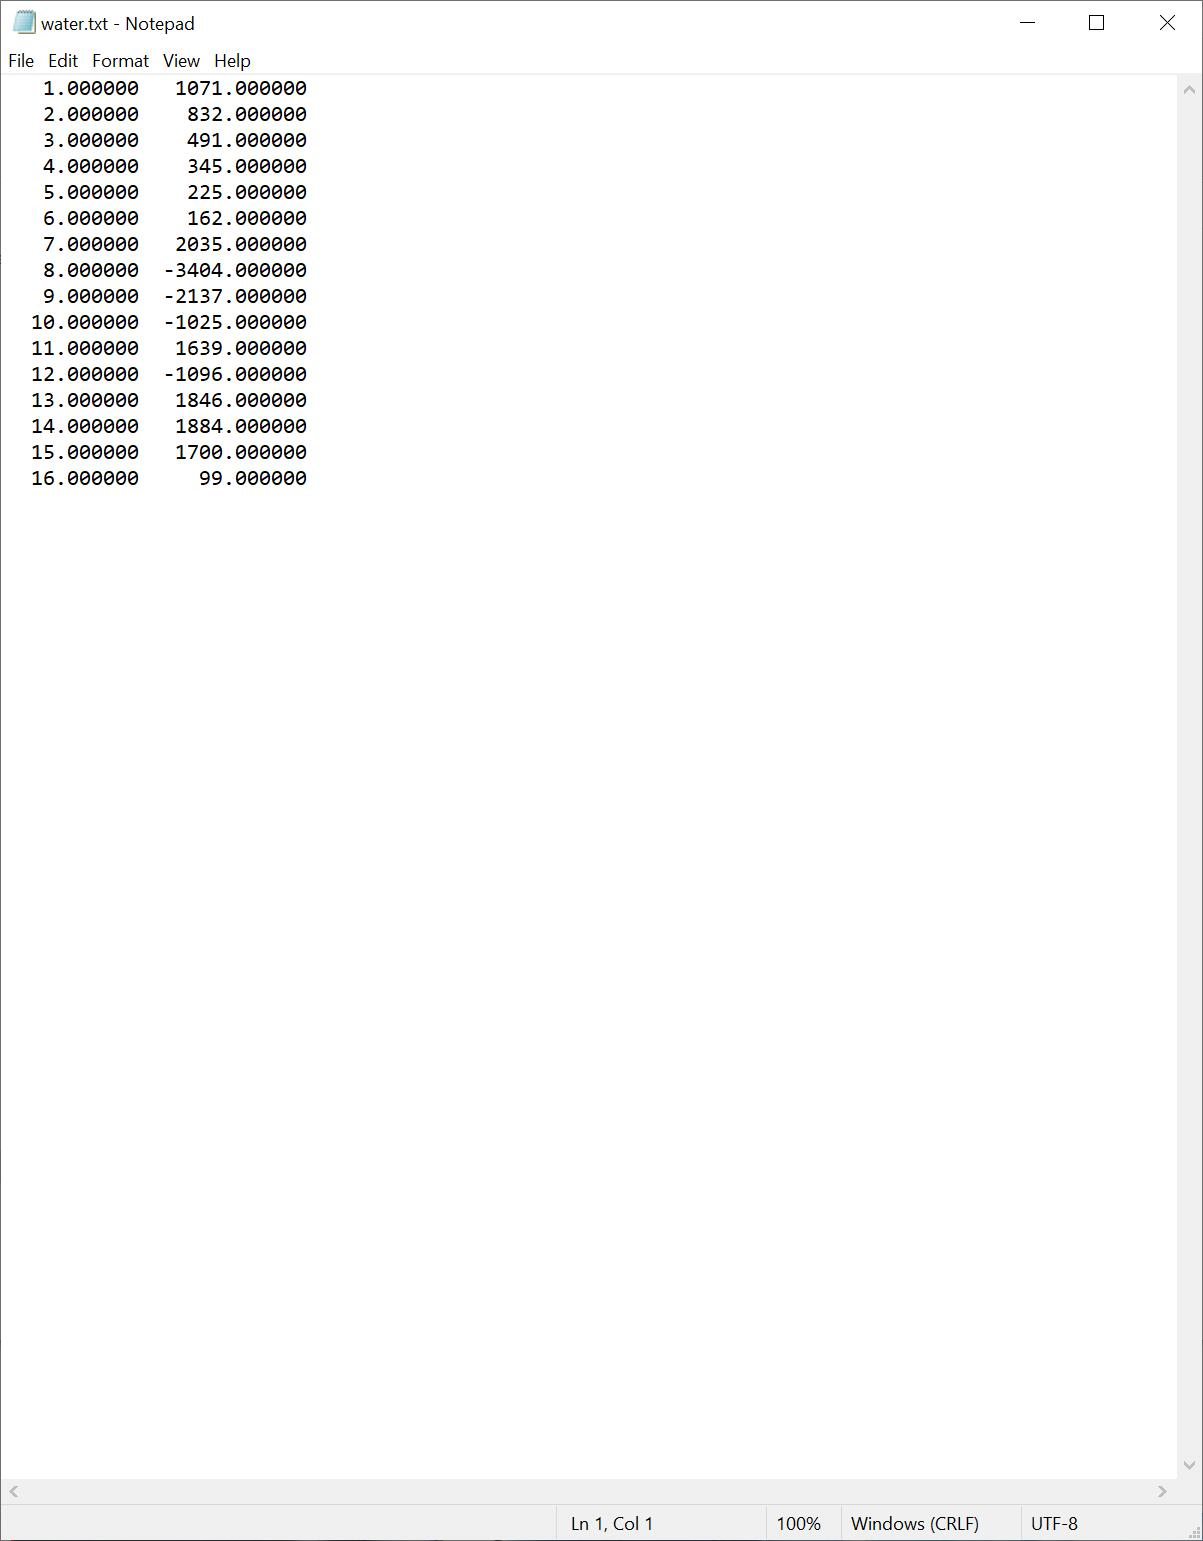

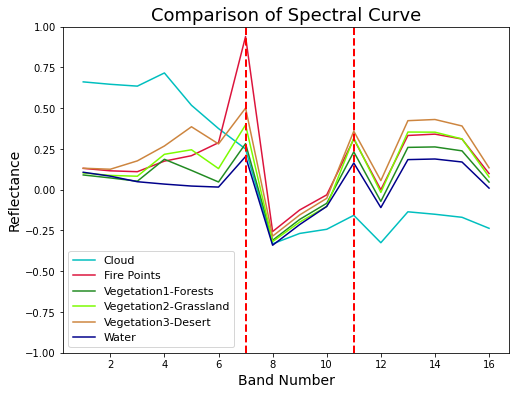

In [4]:
# 下边是6个曲线画在一张图里边

# 首先定义画布大小，figsize这个参数 ，这里也可以像上图一样使用fig，ax = plt.subplots(x,y,figsize= ()),这里x,y是子图数量
# 只有一个图的话实际使用下边这个定义方式较好
fig = plt.figure(figsize = (8,6))

# 对读取的6个地物类型进行画图，这里label对曲线命名方便后续图例的绘画,color的名字可以参照颜色表（https://bbs.bianzhirensheng.com/color01.html）
plt.plot(df1[:,0],df1[:,1],label = 'Cloud',color = 'c')
plt.plot(df2[:,0],df2[:,1],label = 'Fire Points',color = '#DC143C')
plt.plot(df3[:,0],df3[:,1],label = 'Vegetation1-Forests',color = '#228B22')
plt.plot(df4[:,0],df4[:,1],label = 'Vegetation2-Grassland',color = '#7CFC00')
plt.plot(df5[:,0],df5[:,1],label = 'Vegetation3-Desert',color = '#CD853F')
plt.plot(df6[:,0],df6[:,1],label = 'Water',color = '#00008B')

#绘画一个垂直线，x表示绘画处坐标，c表示颜色，ls是线条风格，lw是线条宽度
plt.axvline(x=7, c="r", ls="--", lw=2)
plt.axvline(x=11, c="r", ls="--", lw=2)

#为坐标轴标签命名，fontsize是字体
plt.xlabel('Band Number',fontsize = 14)
plt.ylabel('Reflectance',fontsize = 14)

#为图片附上标题
plt.title('Comparison of Spectral Curve',fontsize = 18)

#图例
plt.legend(loc = 'best',fontsize = 11)

#指定Y轴范围，X轴同理
plt.ylim(-1,1)

#存图
plt.savefig(r'G:\HIMAWARI-\Comparison of Spectral Curves_allinone.jpg',dpi = 300)

#让图片在jupyter或者其他IDL里显示
plt.show()

然后是多图的绘画

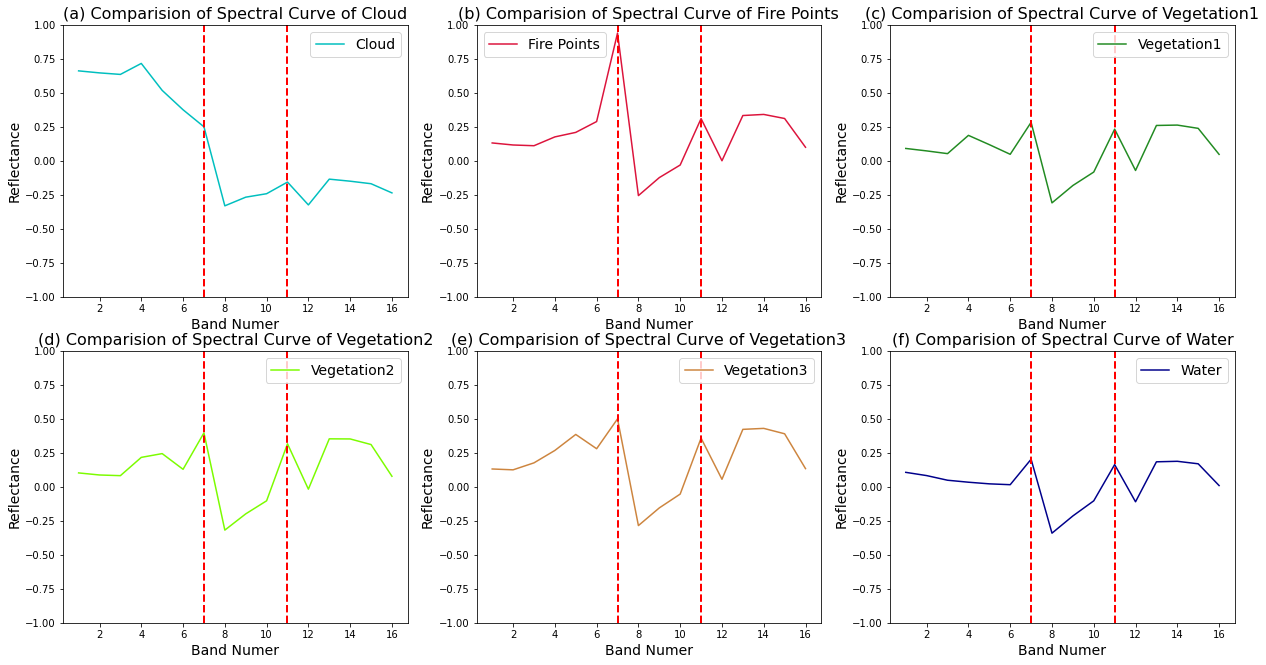

In [5]:
# 定义画布，2行3列共6个图
# 值得一提的是，这里的axes是一个（2,3）形状的矩阵，对应响应图的位置，所以画图的时候可以分别取出单个元素在对应位置做图
fig,axes = plt.subplots(2,3,figsize = (21,11))

list = ['Cloud','Fire Points','Vegetation1','Vegetation2','Vegetation3','Water']
colors = ['c','#DC143C','#228B22','#7CFC00','#CD853F','#00008B']
alpha = ('abcdef')

# 这里做了一个循环，将需要使用的label,color以及图名与六种地物类型对应起来循环画图，总体流程和单图一样，只是分散到不同的ax中去了
for i,ax,df,name,cl,s in zip(range(0,6),np.ravel(axes),(df1,df2,df3,df4,df5,df6),list,colors,alpha):
    ax.set_ylim([-1, 1])
    ax.plot(df[:,0],df[:,1],color = cl,label = name)
    ax.axvline(x=7, c="r", ls="--", lw=2)
    ax.axvline(x=11, c="r", ls="--", lw=2)
    ax.set_title('(%s) Comparision of Spectral Curve of %s'%(s,name),fontsize = 16)
    ax.legend(fontsize = 14)
    ax.set_xlabel('Band Numer',fontsize = 14)
    ax.set_ylabel('Reflectance',fontsize = 14)
plt.savefig(r'G:\HIMAWARI-\Comparison of Spectral Curves.jpg',dpi = 300)
plt.show()

### Style变换 & Grid


### 下图是可以在图中使用的一些标注（https://matplotlib.org/cheatsheets/_images/handout-intermediate.png）
可以参照图中进行变换
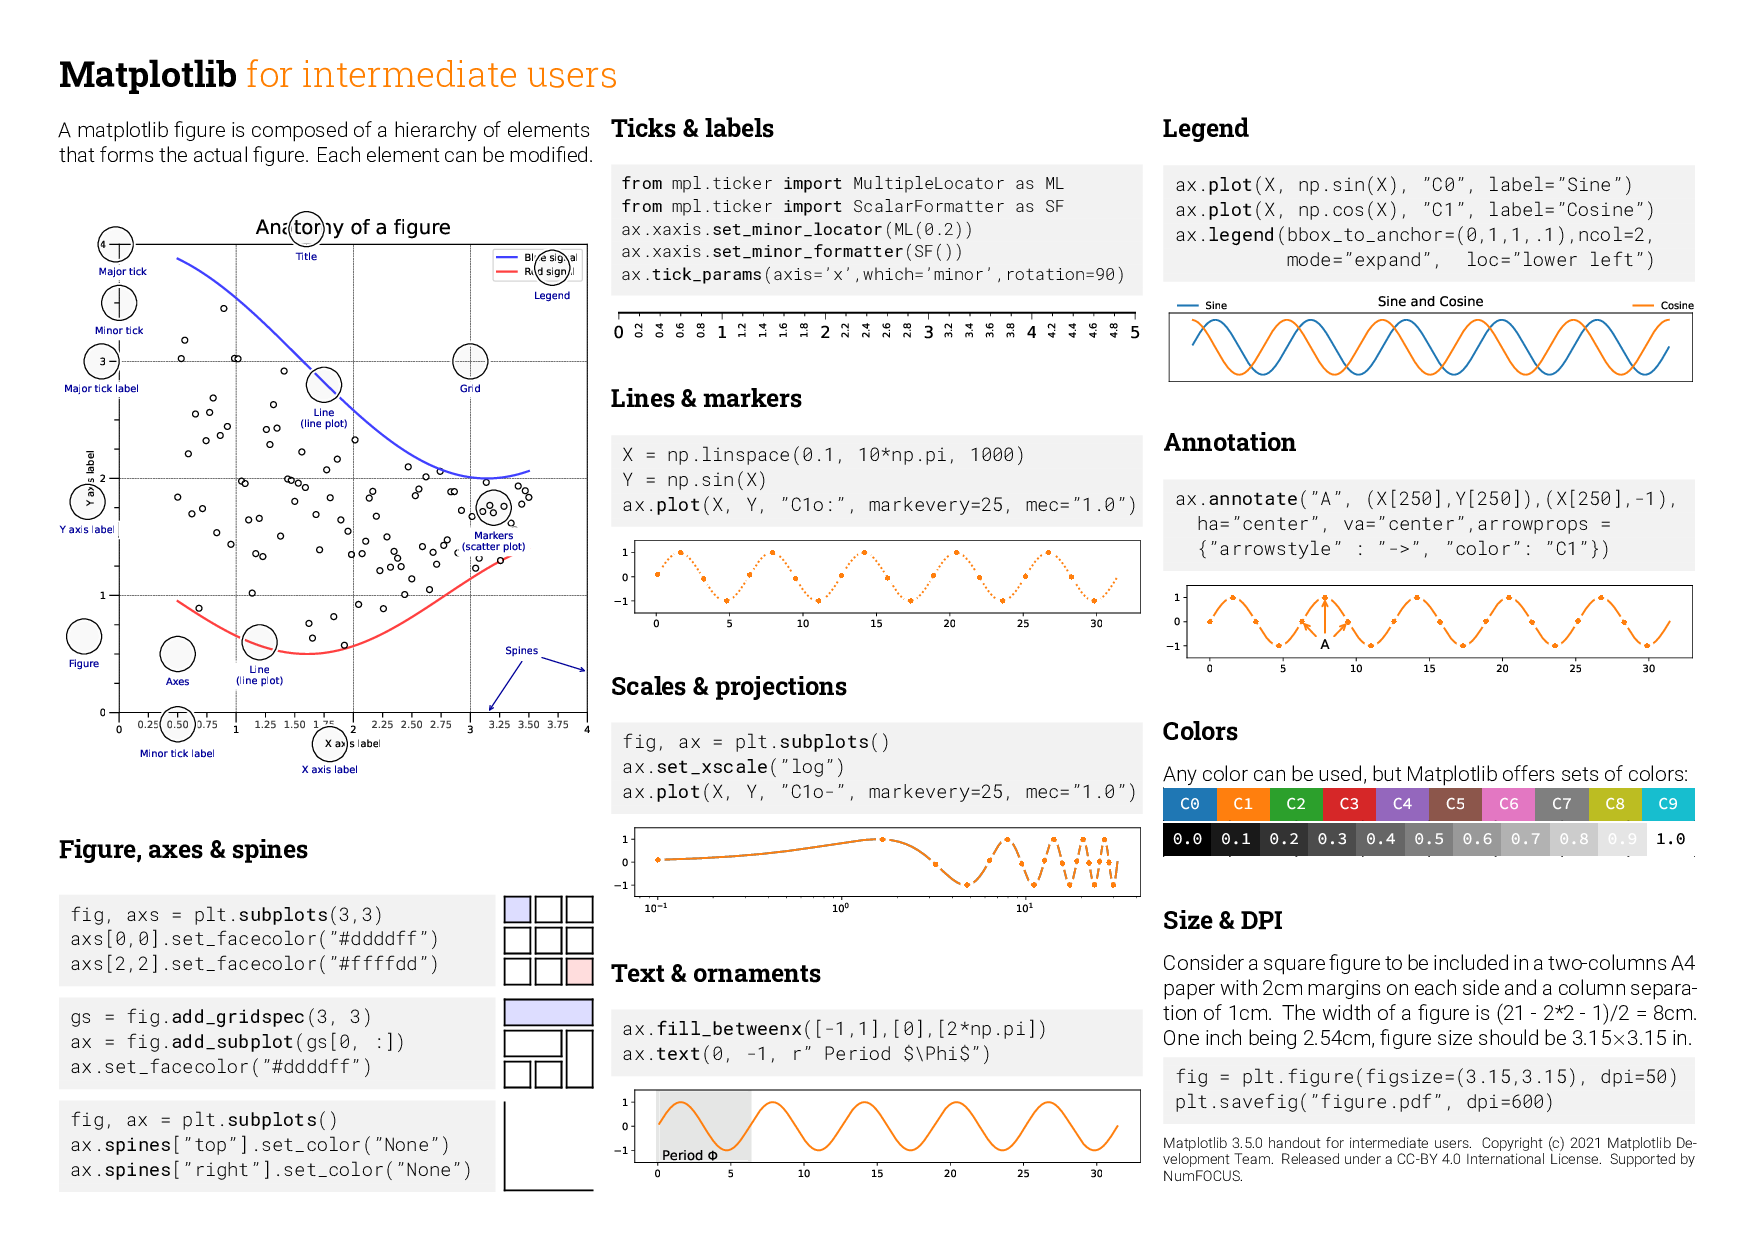

### 下图是matplotlib画图的cheatsheet1 （https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png）

基本涵盖画图的画图的要素类型方面（可以做查阅用）

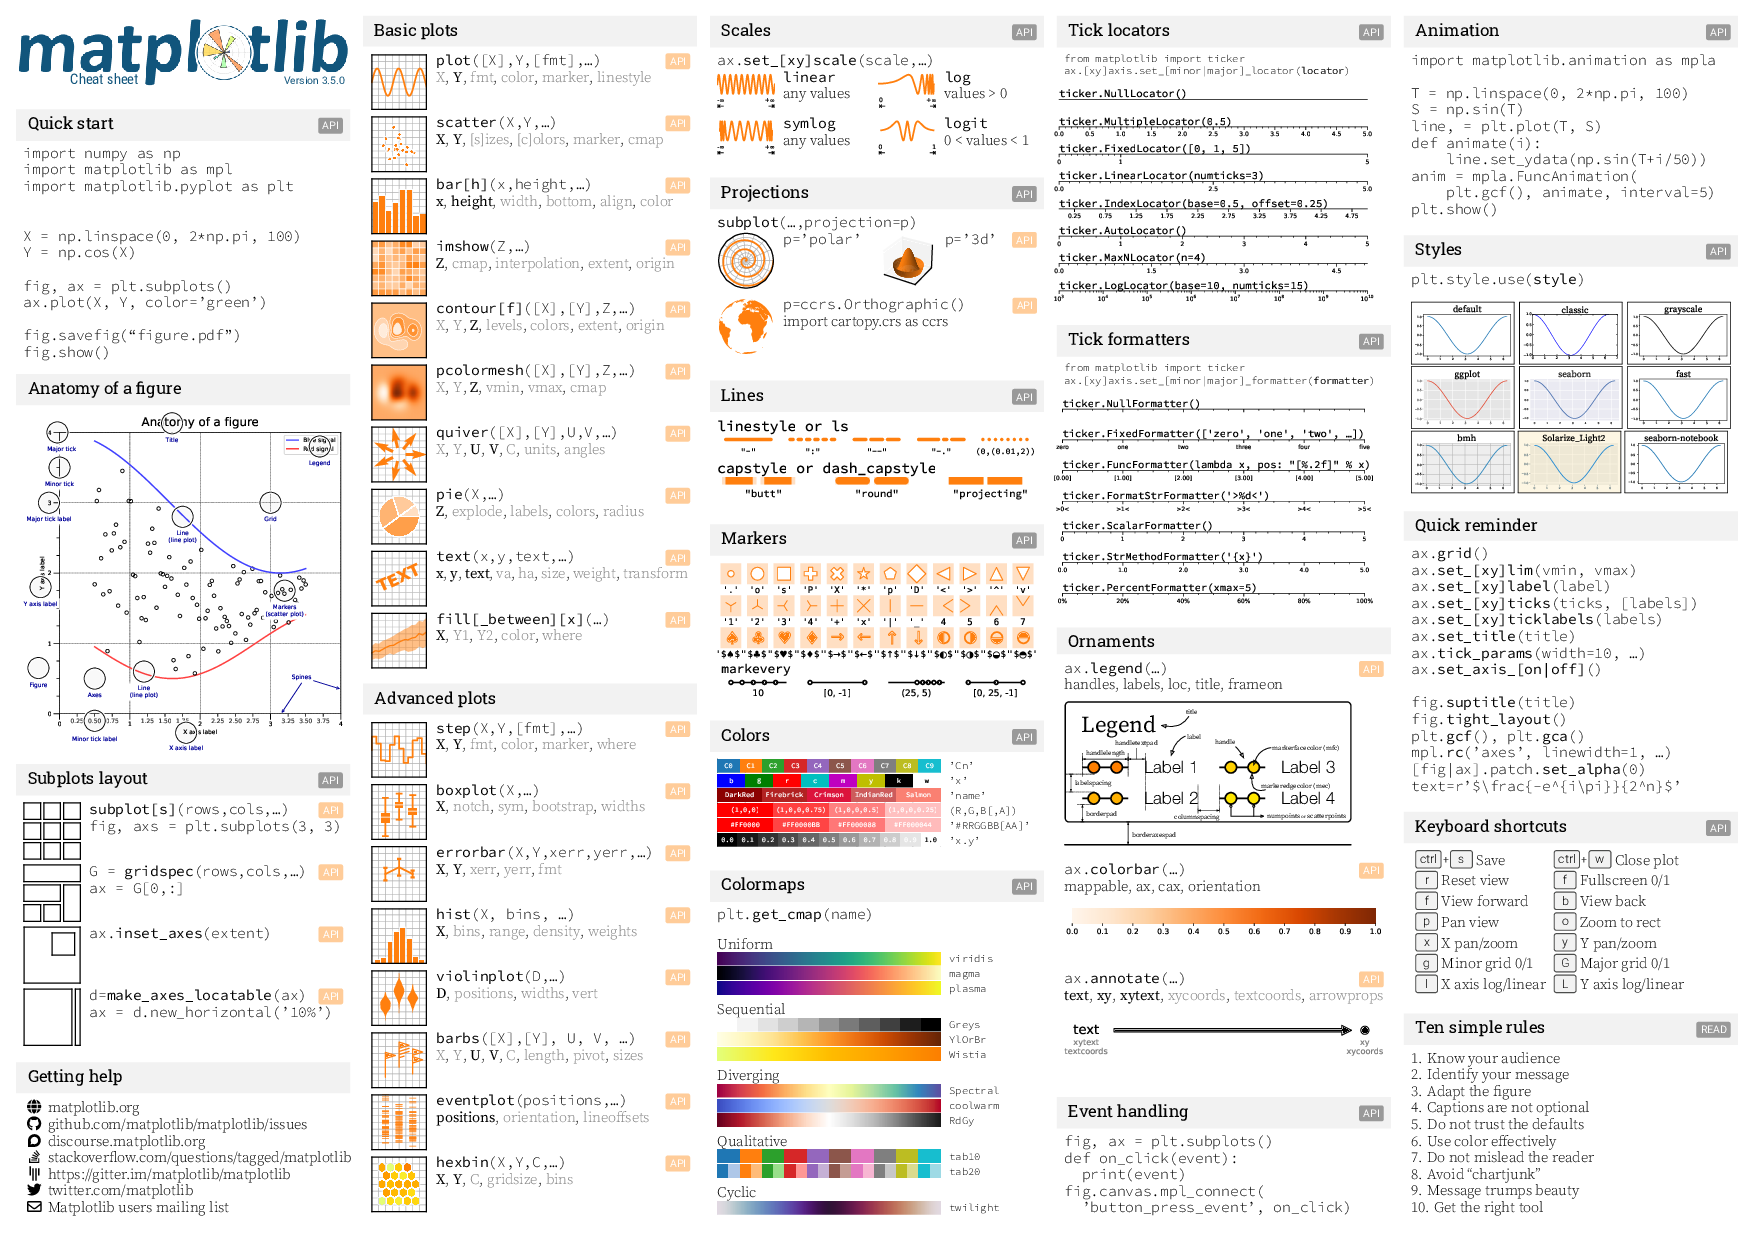

### 下图是matplotlib画图的cheatsheet2（https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png）

基本涵盖画图的layout设计方面（可以在精进图表时做查阅用），包括
-子图调整（plt.axes_adjustments）
-文本参数调整（文本大小，加粗，字体等等）(ax,text('...'，ha=,va=,family=,size=,weight=,fontproperties)
    *ps: ha,va-水平/垂直对齐， size-字体大小， weight-加粗与否， fontproperties-字体类别（serif,italic,normal等）
    
-色条
-图例颜色
-图片插值
-图例摆放（ax.legend,loc对应英文位置，bbox_to_anchor对应坐标位置）


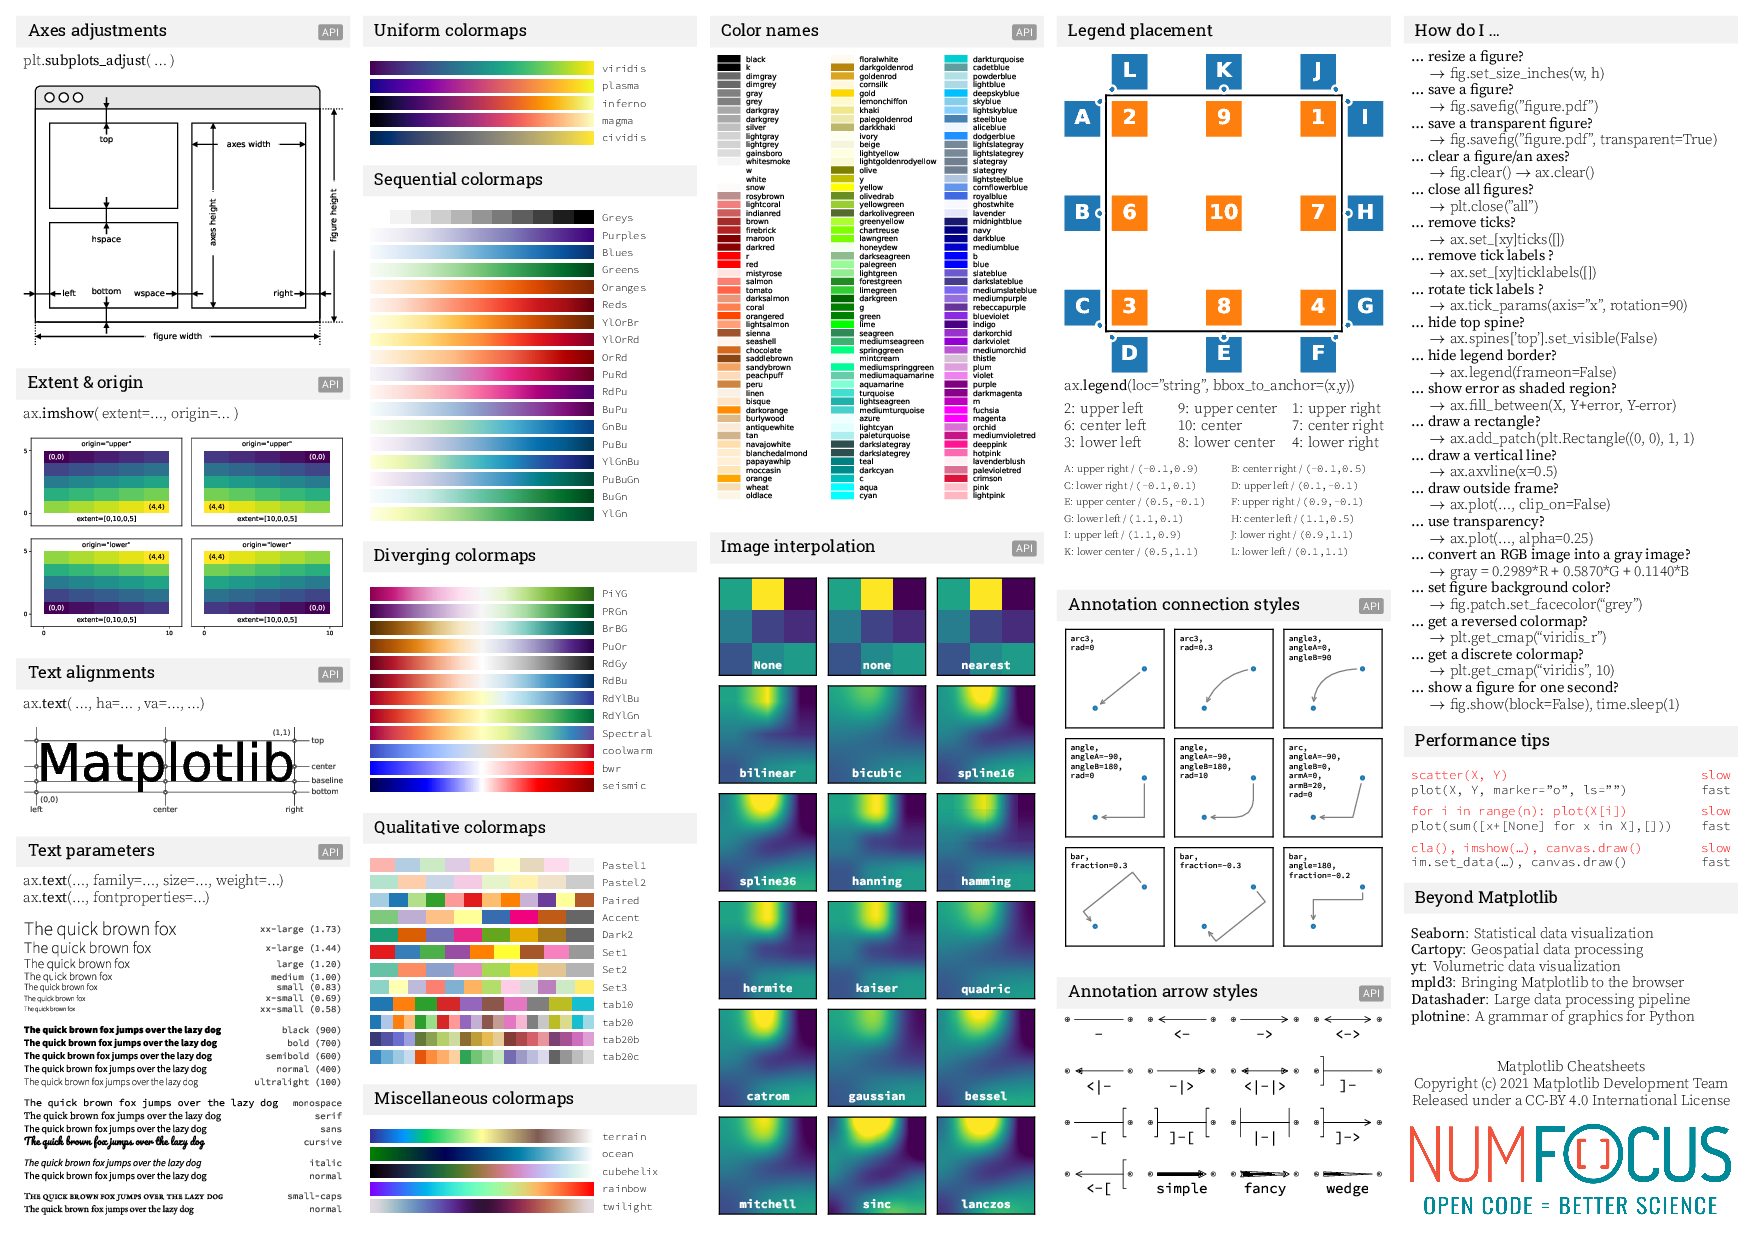